## Python Project I
### Exemplar Solutions for Problem 4
I graded the "Conduct an Analysis" part of Problem 4 on the Python Project I by ranking each team solution comparatively with the other teams. In my ranking, I considered the extent to which each team addressed the five prompts I provided in the project specifications: 
- i. Check to see if your data supports the 49% probability as described above
- ii. Validation checks to ensure that the dice are “fair” (i.e., each number 1 to 6 has equal chance of occurring)
- iii. Summary statistics such as the number of times double sixes occurred in 24 rolls, number of doubles rolled in 24 rolls
- iv. Other interesting statistics
- v. Use your creativity here!

Teams that presented basic descriptive statistics with no interpretation were ranked lower than teams with more detailed interpretation of the results. Based on my comparison, I ended up with five bins with one or more team responses in each bin. I then assigned points to the bins from highest ranking (25 points) to lowest ranking (5 points) in 5 point increments (25, 20, 15, 10, 5). 

With permission, I am sharing the solution from the three teams that scored 20 points or higher in the cells below. I assigned each team response an anonymous team name and modified each solution to remove any identifying information (i.e,. author section of program header). The example solutions are presented in random order and labeled as Example A, Example B, and Example C.

## Example A

In [1]:
# AUTHOR:     Example Solution A
# COURSE:     ANLY 615
# PROGRAM:    Probability of Doubles Simulation
# PURPOSE:    Run a simulation of to test the outcome of rolling 2 die
#             24 times to use as an input to our Probability of Doubles
#             analysis 
# INPUT:      random module
#             csv module
# PROCESS:    Perform a simulation that repeats 24 dice rolls 10,000 times
#             and write the detailed output to SimulationResultsAll.csv and
#             the summarized output to SimulationResultsSummary.csv.
#
#             Calculate summary statistics of the output, report them back to
#             the user, and write them out to SummaryStats.csv.
# OUTPUT:     SimulationResultsAll.csv
#             SimulationResultsSummary.csv
#             SummaryStats.txt
# HONOR CODE: On my honor, as an Aggie, I have neither given 
#             nor received unauthorized aid on this academic work.
        
def printWelcome():
    print("PROBABILITY OF DOUBLES")
    print()
    print("In the mid-1600s, a French nobleman (Antoine Gombaud, Chevalier")
    print("de Méré) frequently gambled using six-sided dice. One of his favorite") 
    print("games of chance involved an attempt to roll at least one “double six”") 
    print("within 24 attempts (or rolls of the 2 dice). He knew the probability to")
    print("roll a double six on any given roll of two dice is 1/36 (6 possible") 
    print("outcomes for each die; 2 dice; 6 * 6 = 36). He falsely assumed that the") 
    print("probability of rolling double sixes in 24 attempts would be 1/36 * 24") 
    print("or approximately 67%. Due to the financial losses he experienced") 
    print("over time, he determined his probability logic must be false. He") 
    print("subsequently sought expertise from Blaise Pascal (a contemporary") 
    print("mathematician) to assist him in determining the correct probability ")
    print("as closer to 49%.")
    print()
    print("This program conducts a version of this study by simulating 10,000") 
    print("rounds of 24 dice rolls, analyzing the results, and printing the")
    print("results of the simulation and the analysis to separate files.")
    print()
    print("*"*75)
    print()

def performSimulation():

    # Import the random module to be used by the simulation.
    
    import random
    
    # Create the empty list, allResults, to store the detailed results of 
    # the simulation and an empty list, summaryResults, to store the summarized
    # results.

    allResults = []
    summaryResults = []

    # Create and append the column header to allResults.

    allResultsHeader = ["Round","Roll","Die-1","Die-2","Doubles","Double Sixes"]
    allResults.append(allResultsHeader)

    # Create and append the column header to summaryResults.

    summaryResultsHeader = ["Round","Doubles","Double Sixes","Winner","Number of Doubles Rolled","Number of Double Sixes Rolled"]
    summaryResults.append(summaryResultsHeader)

    # Loop through 10,000 different rounds of dice rolls.

    for rollRound in range(1,10001):

        #print(f"Starting round {rollRound:}.")

        # Set totalDoubleSixes to 0. 
        
        totalDoubleSixes = 0
        totalDoubles = 0

        # Loop through 24 total rolls of the die.
        
        for roll in range(1,25):

            # Create an empty list to store the rolls results.
            
            rollResults = []
            
            # Use the random.randint function to return a random value between
            # 1 and 6 for each die.
            
            dice1 = random.randint(1,6)
            dice2 = random.randint(1,6)

            # Check for doubles and double sixes. 

            if dice1 == dice2:
                doubles = 1
                totalDoubles += 1
            else:
                doubles = 0

            if dice1 == 6 and dice2 == 6:
                doubleSixes = 1
                totalDoubleSixes += 1
            else:
                doubleSixes = 0

            #print(f"The results of roll number {roll:} are {dice1:} and {dice2:}.")

            # Append all relevant data points to the rollResults list.
            
            rollResults.append(rollRound)
            rollResults.append(roll)
            rollResults.append(dice1)
            rollResults.append(dice2)
            rollResults.append(doubles)
            rollResults.append(doubleSixes)

            #print(rollResults)
                
            # Append the rollResults list to allResults.
                
            allResults.append(rollResults)

            if roll == 24:
                roundSummary = []

                
                if totalDoubles > 0:
                    sumDoubles = "True"
                    
                    if totalDoubleSixes > 0:
                        sumDoubleSixes = "True"
                        winner = "Gambler"
                    else:
                        sumDoubleSixes = "False"
                        winner = "House"
                        
                else:
                    sumDoubles = "False"
                    sumDoubleSixes = "False"
                    winner = "House"                    

                roundSummary.append(rollRound)
                roundSummary.append(sumDoubles)
                roundSummary.append(sumDoubleSixes)
                roundSummary.append(winner)
                roundSummary.append(totalDoubles)
                roundSummary.append(totalDoubleSixes)

                summaryResults.append(roundSummary)
            
            # Increment the roll number up by 1.
            
            roll += 1
        
        # Increment the rollRound up by 1.
        
        rollRound =+ 1

    return allResults, summaryResults
        
def printSimulationResults(allResults,summaryResults):

    # Import the CSV module to print the output.

    import csv
    
    # Now that all 10,000 rounds of 24 dice rolls are complete. Output the
    # allResults list to the SimulationResultsAll.csv file and the summaryResults
    # to the SimulationResultsSummary.csv file.

    with open("SimulationResultsAll.csv","w",newline="") as outfile:
        writer = csv.writer(outfile)
        writer.writerows(allResults)

    with open("SimulationResultsSummary.csv","w",newline="") as outfile:
        writer = csv.writer(outfile)
        writer.writerows(summaryResults)

    # Print a message to the users to indicate the simulation is complete.

    print("The simulation is complete. The files SimulationResultsAll.csv and")
    print("SimulationResultsSummary.csv have been created.")
    print()
    print("*"*75)
    print()
    
def readCSVs():
    import pandas as pd
    
    filename = 'SimulationResultsAll.csv'
    allResultsCSV = pd.read_csv(filename)
    allResultsCSV.columns = allResultsCSV.columns.str.replace(' ', '')
    
    filename = 'SimulationResultsSummary.csv'
    summaryResultsCSV = pd.read_csv(filename)
    summaryResultsCSV.columns = summaryResultsCSV.columns.str.replace(' ', '')
    
    return pd, allResultsCSV, summaryResultsCSV

def analyzeProbability(outfile,summaryResultsCSV):
    
    # Get the complete list of winners.    
    
    winners = summaryResultsCSV['Winner'].tolist()
    #print(winners)
    
    # Count the number of times the gambler and the house each won.
    
    gamblerWins = 0
    
    for i in range(1,len(winners)):
        if winners[i] == "Gambler":
            gamblerWins += 1

    # Calculate and print the probability of the gambler winning.
    
    winProb = gamblerWins / len(winners)

    print(f"The probability of rolling double sixes atleast once in 24 rolls is {winProb:.2%}.")
    print(f"The probability of rolling double sixes atleast once in 24 rolls is {winProb:.2%}.", file=outfile)

    # Check if our probability is within +/- .05 of Blaise Pascal's
    
    if winProb >= .44 and winProb <= .54:
        print("This probability supports Blaise Pascal's work.")
        print("This probability supports Blaise Pascal's work.", file=outfile)
    else:
        print("This probability DOES NOT support Blaise Pascal's work.")
        print("This probability DOES NOT support Blaise Pascal's work.", file=outfile)

    print("")
    print("*"*75)
    print("")
    
    print("", file=outfile)
    print("*"*75, file=outfile)
    print("", file=outfile)

    return winProb

def validateFairness(outfile,allResultsCSV):
    
    # Use the allresults_data dataframe to create a list of all results.
    
    die1Results = allResultsCSV['Die-1'].tolist()
    die2Results = allResultsCSV['Die-2'].tolist()
    
    rollResults = die1Results + die2Results

    # Create an empty list to store the validation data.
    
    allRollsCheck = []

    # Set fairness check to 0. If we find the dice rolls return unexpected
    # or out of range results (using a range of 15% to 18% as normal), set this
    # flag to 1 and return a caution message.

    fairnessCheck = 0

    for i in range(1,7):
    
        count = 0
        rollsCheck =[]
    
        for n in range(1,len(rollResults)):
            if rollResults[n] == i:
                count += 1

        percent = round(count/(len(rollResults)),5)

        # Check if the percent of each dice is within +/- .02 of the simple probability (1/6)
        if percent < .1467 or percent > .1867:
            fairnessCheck = 1

        rollsCheck.append(i)
        rollsCheck.append(count)
        rollsCheck.append(percent)

        allRollsCheck.append(rollsCheck)
        
    print("-"*9," Fairness Validation ","-"*9)
    print("-"*41)
    print("")

    print("-"*9," Fairness Validation ","-"*9, file=outfile)
    print("-"*41, file=outfile)
    print("", file=outfile)

    if fairnessCheck == 1:
        print("The dice roll results DO NOT appear fair")
        print("as there are values outside of the expected")
        print(" range of +/- .02 of .1667.")
        print("Review the output below and repeat the")
        print("simulation if necessary.")
        print("")
        
        print("The dice roll results DO NOT appear fair", file=outfile)
        print("as there are values outside of the expected", file=outfile)
        print(" range of +/- .02 of .1667.", file=outfile)
        print("Review the output below and repeat the", file=outfile)
        print("simulation if necessary.", file=outfile)
        print("", file=outfile)

    else:
        print("The dice roll results appear to be fair")
        print("as all values are within +/- .02 of .1667.")
        print("")
        print("View the output below to verify.")
        print("")
        
        print("The dice roll results appear to be fair", file=outfile)
        print("as all values are within +/- .02 of .1667.", file=outfile)
        print("", file=outfile)
        print("View the output below to verify.", file=outfile)
        print("", file=outfile)

    print("{:^40}".format("Die Roll Fairness Validation"))
    print("{:^40}".format("-"*40))
    print("{:^10}{:5}{:^10}{:5}{:^10}".format("Dice Value","","# of Rolls","","% of Rolls"))
    print("{:^10}{:5}{:^10}{:5}{:^10}".format("-"*10,"","-"*10,"","-"*10))

    print("{:^40}".format("Die Roll Fairness Validation"), file=outfile)
    print("{:^40}".format("-"*40), file=outfile)
    print("{:^10}{:5}{:^10}{:5}{:^10}".format("Dice Value","","# of Rolls","","% of Rolls"), file=outfile)
    print("{:^10}{:5}{:^10}{:5}{:^10}".format("-"*10,"","-"*10,"","-"*10), file=outfile)
    
    for i in range(len(allRollsCheck)):
        print("{:^10}{:5}{:^10,d}{:5}{:^10.2%}".format(allRollsCheck[i][0],"",allRollsCheck[i][1],"",allRollsCheck[i][2]))
        print("{:^10}{:5}{:^10,d}{:5}{:^10.2%}".format(allRollsCheck[i][0],"",allRollsCheck[i][1],"",allRollsCheck[i][2]), file=outfile)
        
    print("")
    print("*"*75)
    print("")
    
    print("", file=outfile)
    print("*"*75, file=outfile)
    print("", file=outfile)

def performAnalysis(outfile,summaryResultsCSV):
    #print(summaryResultsCSV.describe())
    
    print("--- Interesting Stats about the Simulation Results ---")
    print("------------------------------------------------------")
    
    print("--- Interesting Stats about the Simulation Results ---", file=outfile)
    print("------------------------------------------------------", file=outfile)
    
    # Get summary statistics related to all doubles
    countDoubles = summaryResultsCSV.query('NumberofDoublesRolled>0').NumberofDoublesRolled.count()
    totalDoubles = summaryResultsCSV.query('NumberofDoublesRolled>0').NumberofDoublesRolled.sum()
    maxDoubles = summaryResultsCSV.query('NumberofDoublesRolled>0').NumberofDoublesRolled.max()
    avgDoubles = summaryResultsCSV.query('NumberofDoublesRolled>0').NumberofDoublesRolled.mean()
 
    print()
    print("Doubles:")
    print("--------")
    print(f"Doubles occurred at least once in {countDoubles:,d} rounds.")
    print(f"Doubles were rolled a total of {totalDoubles:,d} times.")
    print(f"The max number of times doubles showed up in a single round was {maxDoubles:,d}.")
    print(f"The average number of doubles per round was {avgDoubles:,.2}.")
       
    print("", file=outfile)
    print("Doubles:", file=outfile)
    print("--------", file=outfile)
    print(f"Doubles occurred at least once in {countDoubles:,d} rounds.", file=outfile)
    print(f"Doubles were rolled a total of {totalDoubles:,d} times.", file=outfile)
    print(f"The max number of times doubles showed up in a single round was {maxDoubles:,d}.", file=outfile)
    print(f"The average number of doubles per round was {avgDoubles:,.2}.", file=outfile)
    
    # Get summary statistics related to double sixes
    countDoubleSixes = summaryResultsCSV.query('NumberofDoubleSixesRolled>0').NumberofDoubleSixesRolled.count()
    totalDoubleSixes = summaryResultsCSV.query('NumberofDoubleSixesRolled>0').NumberofDoubleSixesRolled.sum()
    maxDoubleSixes = summaryResultsCSV.query('NumberofDoubleSixesRolled>0').NumberofDoubleSixesRolled.max()
    avgDoubleSixes = summaryResultsCSV.query('NumberofDoubleSixesRolled>0').NumberofDoubleSixesRolled.mean()
    
    print()
    print("Double Sixes:")
    print("-------------")
    print(f"Doubles occurred at least once in {countDoubleSixes:,d} rounds.")
    print(f"Doubles were rolled a total of {totalDoubleSixes:,d} times.")
    print(f"The max number of times doubles showed up in a single round was {maxDoubleSixes:,d}.")
    print(f"The average number of doubles per round was {avgDoubleSixes:,.2}.")
    
    print("", file=outfile)
    print("Double Sixes:", file=outfile)
    print("-------------", file=outfile)
    print(f"Doubles occurred at least once in {countDoubleSixes:,d} rounds.", file=outfile)
    print(f"Doubles were rolled a total of {totalDoubleSixes:,d} times.", file=outfile)
    print(f"The max number of times doubles showed up in a single round was {maxDoubleSixes:,d}.", file=outfile)
    print(f"The average number of doubles per round was {avgDoubleSixes:,.2}.", file=outfile)
    
    #Calculate the percent of doubles that were double sixes
    percentDoubleSixes = totalDoubleSixes/totalDoubles
    
    print()
    print("Combined:")
    print("---------")
    print(f"{percentDoubleSixes:.2%} of the total doubles rolled were double sixes.")
    
    print("", file=outfile)
    print("Combined:", file=outfile)
    print("---------", file=outfile)
    print(f"{percentDoubleSixes:.2%} of the total doubles rolled were double sixes.", file=outfile)
    
    print()
    print("*"*75)
    print()
    print("The analysis is complete. A copy of the findings can be found in the file")
    print("SummaryStats.txt.")
    print()
    print("*"*75)

def main():

    with open("SummaryStats.txt", "w") as ss:
        print("RESULTS OF PROBABILITY OF DOUBLES SIMULATION",file=ss)
        print("",file=ss)
        print("*"*75,file=ss)
        print("",file=ss)
        
        printWelcome()
        allResults, summaryResults = performSimulation()
        printSimulationResults(allResults,summaryResults)
        pd, allResultsCSV, summaryResultsCSV = readCSVs()
        winProb = analyzeProbability(ss,summaryResultsCSV)
        allRollsCheck = validateFairness(ss,allResultsCSV)
        performAnalysis(ss,summaryResultsCSV)
    
if __name__ == "__main__":
    main()


PROBABILITY OF DOUBLES

In the mid-1600s, a French nobleman (Antoine Gombaud, Chevalier
de Méré) frequently gambled using six-sided dice. One of his favorite
games of chance involved an attempt to roll at least one “double six”
within 24 attempts (or rolls of the 2 dice). He knew the probability to
roll a double six on any given roll of two dice is 1/36 (6 possible
outcomes for each die; 2 dice; 6 * 6 = 36). He falsely assumed that the
probability of rolling double sixes in 24 attempts would be 1/36 * 24
or approximately 67%. Due to the financial losses he experienced
over time, he determined his probability logic must be false. He
subsequently sought expertise from Blaise Pascal (a contemporary
mathematician) to assist him in determining the correct probability 
as closer to 49%.

This program conducts a version of this study by simulating 10,000
rounds of 24 dice rolls, analyzing the results, and printing the
results of the simulation and the analysis to separate files.

************

## Example B

You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.
Here is the distribution of values for the first die...fairly equal odds as expected.
see image ('die1_rolls.png')
Here is the distribution of values for the second die...fairly equal odds as expected.
see image ('die2_rolls.png')
You rolled doubles 39,862 times, or 16.61% of the time.
You rolled double sixes 6,684 times, or 2.79% of the time.

In 24 rolls, you typically see double sixes about 49% of the time.
In your 10,000 sets of 24 dice rolls you rolled double sixes 49.56% of the time.

Your results are in the range of what is expected.


Number of double sixes
in a set of 24 rolls
~~~~~~~~~~~~~~~~~~~~~~~~
# double 6  # times seen
   0:            5044
   1:            3518
   2:            1190
   3:             208
   4:              38
   5:               2


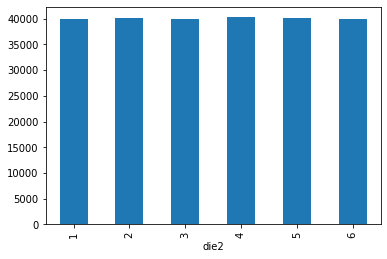

In [2]:
import random
import pandas as pd

def rolldice(): #This function gets generates 240,000 dice rolls
    dieOne = 0
    dieTwo = 0
    doubleSix = 0
    totalDoubleSix = 0
    six = 6
    line=""
    one = 1
    zero = 0
    listc = []
    lofl = []
    gline=""
    # open files to write to them
    with open("roll.csv", "w") as wfile:
        with open("gambler.csv", "w") as gfile:        
            for i in range(1,10001): # generate 10,000 sets of rolls
                line=""
                listc = []
                gline=""
                doubleSix = 0
                gline = str(i) + "," 
                for dice in range(1,25): # generate 24 dice rolls
                    line=""
                    dieOne = random.randint(1, 6)
                    dieTwo = random.randint(1, 6)
                    line = str(i) + "," + str(dice) + "," + str(dieOne) + "," + str(dieTwo) + "," 
                    if dieOne == dieTwo: # finds both die has same number
                        line = line + str(one) + ","
                    else:
                        line = line + str(zero) + ","

                    if dieOne == six and dieTwo == six: # finds both die has number six
                        line = line + str(one) 
                        doubleSix += 1
                        totalDoubleSix += 1
                    else:
                        line = line + str(zero)
                    listc.append(line)
                    wfile.write(f"{line}\n")
                if doubleSix >= 1: # determine who wins and record it
                    gline = str(i) + "," + "True" + "," + "Gambler" + "," + str(doubleSix)
                else:
                    gline = str(i) + "," + "False" + "," + "House" + "," + str(zero)
                gfile.write(f"{gline}\n")
            lofl.append(listc)            
        gfile.close()
    wfile.close()

def analytics():
    # loading data for analysis
    # creating tables to evaluate the distribution of rolls
    gamblerDF = pd.read_csv('gambler.csv', names=['group','double_six','winner','double_sixes'])
    rollDF = pd.read_csv('roll.csv', names=(
        'round_num', 'roll_num', 'die1', 'die2', 'doubles', 'double_six'))
    # saving images of the die value histograms for the user to examine
    a = rollDF.groupby('die1')['die1'].agg('count').plot.bar()
    a.figure.savefig('die1_rolls.png')
    b = rollDF.groupby('die2')['die2'].agg('count').plot.bar()
    b.figure.savefig('die2_rolls.png')
    # getting totals for stats calcs
    double6 = rollDF['double_six'].sum() # how many double 6
    doubles = rollDF['doubles'].sum() # how many doubles
    # how many of the sets had at least one double six
    setDoubles = gamblerDF[gamblerDF.winner == 'Gambler'].count()['winner']
    # superSets = gamblerDF[gamblerDF.double_six > 1].count()[3]
    superSets = gamblerDF.double_sixes.value_counts()
 
    # displaying output to user
    print(
        f"You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.\n"
        f"Here is the distribution of values for the first die...fairly equal odds as expected.\n"
        f"see image ('die1_rolls.png')\n"
        f"Here is the distribution of values for the second die...fairly equal odds as expected.\n"
        f"see image ('die2_rolls.png')\n"
        f"You rolled doubles {doubles:,} times, or {doubles/240000:.2%} of the time.\n"
        f"You rolled double sixes {double6:,} times, or {double6/240000:.2%} of the time.\n\n"
        f"In 24 rolls, you typically see double sixes about 49% of the time.\n"
        f"In your 10,000 sets of 24 dice rolls you rolled double sixes {setDoubles/10000:.2%} of the time.\n"    
        )
    if (setDoubles/10000) > .5:
        print("Book your flight to Vegas, baby!\n\n")
    elif (setDoubles/10000) > .4:
        print("Your results are in the range of what is expected.\n\n")
    else:
        print("Better luck next time.\n\n")
    print(
        f"Number of double sixes\nin a set of 24 rolls\n"
        f"~~~~~~~~~~~~~~~~~~~~~~~~\n"
        f"# double 6  # times seen"
        )
    i = 0
    for row in superSets:
        print(
            f"   {i}: {row:>15}"
            )
        i+=1
    # take the outputs and saving the same output to a txt file, and directing user to saved image locations.
    with open('stats.txt', 'w') as f:
        f.write(
            f"You just ran a set of 24 rolls, 10,000 times for a total of 240,000 rolls.\n"
            f"The distribution of values for the first die...fairly equal odds as expected.\n"
            f"see image ('die1_rolls.png')\n"
            f"The distribution of values for the second die...fairly equal odds as expected.\n"
            f"see image ('die2_rolls.png')\n"
            f"You rolled doubles {doubles:,} times, or {doubles/240000:.2%} of the time.\n"
            f"You rolled double sixes {double6:,} times, or {double6/240000:.2%} of the time.\n\n"
            f"In 24 rolls, you typically see double sixes about 49% of the time.\n"
            f"In your 10,000 sets of 24 dice rolls you rolled double sixes {setDoubles/10000:.2%} of the time.\n\n"
        )
        if (setDoubles/10000) > .5:
            f.write("Book your flight to Vegas, baby!\n\n")
        elif (double6/10000) > .4:
            f.write("Your results are in the range of what is expected.\n\n")
        else:
            f.write("Better luck next time.\n\n")
        f.write(
            f"Number of double sixes\nin a set of 24 rolls\n"
            f"~~~~~~~~~~~~~~~~~~~~~~\n"
            f"# double 6  # times seen\n"
            )
        i = 0
        for row in superSets:
            f.write(
                f"  {i}: {row:>15}\n"
                )
            i+=1
    return

def main():
    rolldice()
    analytics()

if __name__ == "__main__":
    main()

## Example C

In [3]:
# PROGRAM:      Python Project 1, Problem 4
# PURPOSE:      The program is to repeat the 24 rolls of rolling two dice
#               10,000 times. It will check if the simulated data from the rolls
#               would provide evidence to support the 49% probability of rolling
#               double sixes at least once in 24 rolls of 2 dice
# INPUT:        There is no user input in this program
# PROCESS:      define the rolling dice function
#                   create a list of lists using two for loops for rolls and rounds
#                   use a counter to count the number of double sixes
#                   append each loop to rolls for the inner loop
#                   append each loop to rounds for the outer loop
#               define a function to write both Rolls and Rounds cvs files
#               define a function to check the probability of 49%
#                   use a for loop to add 1 to the counter and calculate by dividing the total(len of list)
#               define a function to do validation checks
#                   use 6 counters to count the number of times 1-6 each rolled in both die1 and die2
#                   divide each counter/sum of counters*100 to get the changes in percentage
#                   return the 6 chances
#               define a function to display summary and interesting finds
#                   use for loop to calculate the number of doubles for 24 rolls from the rolls list
#                   use the same loop to calculate the number of double sixes for 24 rolls
#                   append both numbers above with an index number to a new list for display to user
#                   write that list to a txt file
#               define a main function to control the program flow
#               call the main function
# OUTPUT:       summary statistics displayed to the user
#               including whether the dataset supports the probability of 49 percent
#               and a table of interesting finds
# HONOR CODE:   On my honor, as an Aggie, I have neither given 
#               nor received unauthorized aid on this academic work.

# PSEUDO CODE:  

import random #import the random module
import csv

'''define a function to play the rolling dice game, rolls[] is to store 24 rolls 10,000 times, rounds[] is to store outcome from each round of 24 rolls'''
def rollDice():
    rolls=[]
    rounds=[]
    
    
    for r in range (10000): #used 2 original for fast processing and debugging
        doubleSixes=0
        doubles=0
        double1=0
        double2=0
        double3=0
        double4=0
        double5=0
        double6=0
        tempListRounds=[]
        tempListRounds.append(r+1)
        
                        
        for i in range(24):#used 2 original for fast processing and debugging
            
            tempList=[]
            #random function creates a random integer in the range provided
            die1=random.randint(1,6)
            die2=random.randint(1,6)
            tempList.append(r+1)#index for rounds
            tempList.append(i+1)#index for rolls           
            tempList.append(die1)            
            tempList.append(die2)
            
            #this checks for doubles in each of the rolls in each round
            if die1==die2==1:
                double1+=1 #keep the count for rolling double "1"s
                doubles+=1
                tempList.append(1)#doubles field records 1            
                tempList.append(0)#double sixes field records 0
            elif die1==die2==2:
                double2+=1 #keep the count for rolling double "2"s
                doubles+=1
                tempList.append(1)#doubles field records 1            
                tempList.append(0)#double sixes field records 0
            elif die1==die2==3:
                double3+=1 #keep the count for rolling double "3"s
                doubles+=1
                tempList.append(1)#doubles field records 1            
                tempList.append(0)#double sixes field records 0
            elif die1==die2==4:
                double4+=1 #keep the count for rolling double "4"s
                doubles+=1
                tempList.append(1)#doubles field records 1            
                tempList.append(0)#double sixes field records 0
            elif die1==die2==5:
                double5+=1 #keep the count for rolling double "5"s
                doubles+=1
                tempList.append(1)#doubles field records 1            
                tempList.append(0)#double sixes field records 0
            elif die1==die2==6:
                doubleSixes+=1 #keep the count for rolling double "6"s
                doubles+=1
                tempList.append(1) #doubles field records 1               
                tempList.append(1)#double sixes records 1             
                
            else:                          
                tempList.append(0)#doubles field records 0
                tempList.append(0)#double sixes records 0
            rolls.append(tempList)
           
             
        if doubleSixes>=1:
            tempListRounds.append("True")           
            tempListRounds.append("Gambler")           
        else:
            tempListRounds.append("False")            
            tempListRounds.append("House")
        tempListRounds.append(f"{doubles}")
        tempListRounds.append(f"{double1}")
        tempListRounds.append(f"{double2}")
        tempListRounds.append(f"{double3}")
        tempListRounds.append(f"{double4}")
        tempListRounds.append(f"{double5}")
        tempListRounds.append(f"{doubleSixes}")
        rounds.append(tempListRounds)
      
    #print(rolls)check if it worked
    #print(rounds)check if it worked
    return rolls, rounds

'''write the list rolls to csv file "Rolls"'''

#This function writes the results to the appropriate files
#this answers part c &d

def writeFiles(rolls,rounds):
    headerOfRolls = ["Round", "Roll", "Die-1", "Die-2", "Doubles","Double Sixes"]
    headerOfRounds= ["Round", "Double Sixes(T/F)", "Winner", "Total Doubles","Double Ones","Double Twos","Double Threes","Double Fours","Double Fives","Double Sixes"]
    
    with open("Rolls.csv", "w",newline='') as csvFile:
        writer = csv.writer(csvFile) 
        writer.writerow(headerOfRolls)
        writer.writerows(rolls)
                
    with open("Rounds.csv","w", newline='') as csvfile2:       
        writer = csv.writer(csvfile2)
        writer.writerow(headerOfRounds)        
        writer.writerows(rounds)
        
'''check probability of 49% with the data from csv file Rounds'''
'''use the number of non-zeros in the double sixes column to divide by the total rows to get the percentage'''

def probabilityCheck(rounds):
    counter=0
    
    for round in rounds:
        if round[9]!="0":
            counter+=1
    total=len(rounds)
    probability=(counter/total)*100
    return probability

'''4e.validation checks to ensure that the dice are "fair". i.e., each number 1 to 6 has equal chance of occuring'''
def validationCheck(rolls):
    counter1=0
    counter2=0
    counter3=0
    counter4=0
    counter5=0
    counter6=0
    
    #This step is counting all of the rolls and will look at them later
    for roll in rolls:
        if roll[2]==1:
            counter1 +=1
        elif roll[2]==2:
            counter2 +=1
        elif roll[2]==3:
            counter3 +=1
        elif roll[2]==4:
            counter4 +=1
        elif roll[2]==5:
            counter5 +=1
        elif roll[2]==6:
            counter6 +=1
    for roll in rolls:
        if roll[3]==1:
            counter1 +=1
        elif roll[3]==2:
            counter2 +=1
        elif roll[3]==3:
            counter3 +=1
        elif roll[3]==4:
            counter4 +=1
        elif roll[3]==5:
            counter5 +=1
        elif roll[3]==6:
            counter6 +=1
    
            
    total = counter1 + counter2 + counter3 + counter4 + counter5 +counter6
    '''Here is the dilema: when checking for being "fair", are we looking at if the chances are completely equal to the decimal points or approximate to whole numbers?
    if we round them to whole numbers, it'd be "fair". But if we round to 2 decimal points, they are not completely equal, it'd be "unfair".'''
    chance1=round(100*counter1/total) #this calculates the chance of rolling a 1 out of all rolls of both die 1 and die 2
    chance2=round(100*counter2/total) #this calculates the chance of rolling a 2 out of all rolls of both die 1 and die 2
    chance3=round(100*counter3/total) #this calculates the chance of rolling a 3 out of all rolls of both die 1 and die 2
    chance4=round(100*counter4/total) #this calculates the chance of rolling a 4 out of all rolls of both die 1 and die 2
    chance5=round(100*counter5/total) #this calculates the chance of rolling a 5 out of all rolls of both die 1 and die 2
    chance6=round(100*counter6/total) #this calculates the chance of rolling a 6 out of all rolls of both die 1 and die 2
    return chance1,chance2,chance3,chance4,chance5,chance6 


#This funciton helps to calculate some of the summary statistics
def summaryStats(rolls):
    count2=count3=count4=count5=count6=count7=count8=count9=count10=count11=count12=0
    #This step is looking at the totals of the rolls and will look at them later
    for roll in rolls:
        if roll[2]+roll[3]==2:
            count2 +=1
        elif roll[2]+roll[3]==3:
            count3 +=1
        elif roll[2]+roll[3]==4:
            count4 +=1
        elif roll[2]+roll[3]==5:
            count5 +=1
        elif roll[2]+roll[3]==6:
            count6 +=1
        elif roll[2]+roll[3]==7:
            count7 +=1
        elif roll[2]+roll[3]==8:
            count8 +=1
        elif roll[2]+roll[3]==9:
            count9 +=1
        elif roll[2]+roll[3]==10:
            count10 +=1
        elif roll[2]+roll[3]==11:
            count11 +=1
        elif roll[2]+roll[3]==12:
            count12 +=1
    
    doubleStreak = 0
    mostDouble6 =[0,0]
    mostDouble =[0,0]
    double6s1 = 0
    double6s2 = 0
    double6s3 = 0
    double6s4 = 0
    double6s5 = 0
    for i in range(0,10000):
        double = 0
        double6 = 0
        for j in range(0,24):
            k = (i*24)+j
            if rolls[k][4] == 1:
                double +=1
            if rolls[k][5] == 1:
                double6 +=1
        #this looks for the round with the most doubles sixes
        if double6 > mostDouble6[1]:
            mostDouble6[0]=rolls[k][0]
            mostDouble6[1]=double6
            #print(mostDouble6)
        #this breaks down how the rounds with double sixes are broken down
        if double6 ==1:
            double6s1 +=1
        if double6 == 2:
            double6s2 +=1
        if double6 == 3:
            double6s3 +=1
        if double6 == 4:
            double6s4 +=1
        if double6 >= 5:
            double6s4 +=1
   
        #this looks for the round with the most doubles    
        if double > mostDouble[1]:
            mostDouble[0]=rolls[k][0]
            mostDouble[1]=double
            #print(mostDouble)    
        if double == 24:
            doubleStreak +=1
    #print(doubleStreak)        
    doubleSixRound = [double6s1, double6s2, double6s3, double6s4, double6s5]
    #print(doubleSixRound)
    countStat = [count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12]
    #countCount = count2 + count3 + count4 +count5+count6+count7+count8+count9+count10+count11+count12
    
    percentStat = []
    for i in range(0,11):
        percent = countStat[i]/240000*100
        percent = round(percent,2)
        percentStat.append(percent)
    
    totalCount = count2*2+count3*3+count4*4+count5*5+count6*6+count7*7+count8*8+count9*9+count10*10+count11*11+count12*12
    
    return(mostDouble, doubleSixRound, countStat, percentStat, totalCount, doubleStreak)
    
#this function prints the results to the screen
def displaySummary(chance1,chance2,chance3,chance4,chance5,chance6,rolls,rounds,probability,doubleSixRound, countStat, percentStat, totalCount, doubleStreak, mostDouble):
    probability=probabilityCheck(rounds)
    if 47.5 < round(probability,2) < 50.5:
        print('1) We ran a "simulation" program that repeats the 24 rolls 10,000 times.')
        print(f"   The probability of rolling double sixes at least once in 24 rolls of 2 dice is {round(probability,2)}%.")
        print('   It is approximately 49+/-1.5%.')
        print('   Our simulated dataset provides supporting evidence of the 49% probability')
        print(" ")
    else:
        print('1) We ran a "simulation" program that repeats the 24 rolls 10,000 times.')
        print(f"   The probability of rolling double sixes at least once in 24 rolls of 2 dice is {round(probability,2)}%.")
        print('   It is outside of 49+/-1.5%.')
        print('   Our simulated dataset provides supporting evidence of the 49% probability')
        print(" ")
    
    chance1,chance2,chance3,chance4,chance5,chance6 =validationCheck(rolls)
    if chance1==chance2==chance3==chance4==chance5==chance6:
        print(f'2) The dice are "fair" as each die was rolled approximately {chance1}% of total times.')
    else:
        print(f'2) It appears the dice are not "fair".')
        print(f'   Die 1 rolled {chance1}%.')
        print(f'   Die 2 rolled {chance2}%.')
        print(f'   Die 3 rolled {chance3}%.')
        print(f'   Die 4 rolled {chance4}%.')
        print(f'   Die 5 rolled {chance5}%.')
        print(f'   Die 6 rolled {chance6}%.')
    
    print("---"*40)
    '''create a summary table to display findings'''
    counterOne=0 #keep the count of double ones in all rounds
    counterTwo=0 #keep the count of double twos in all rounds
    counterThree=0 #keep the count of double threes in all rounds
    counterFour=0 #keep the count of double fours in all rounds
    counterFive=0 #keep the count of double fives in all rounds
    counterSix=0 #keep the count of double sixes in all rounds
    total=0 #keep the count of total number of doubles in all rounds

    for row in rounds:
        counterOne+=int(row[4])
        counterTwo+=int(row[5])
        counterThree+=int(row[6])
        counterFour+=int(row[7])
        counterFive+=int(row[8])
        counterSix+=int(row[9])
    total=counterOne+counterTwo+counterThree+counterFour+counterFive+counterSix

    tempList1=[]
    tempList2=[]
    tempList1.append(total)
    tempList1.append(counterOne)
    tempList1.append(counterTwo)
    tempList1.append(counterThree)
    tempList1.append(counterFour)
    tempList1.append(counterFive)
    tempList1.append(counterSix)
    
    tempList2.append("Total Doubles,Double Ones,Double Twos,Double Threes,Double Fours,Double Fives,Double Sixes")
    for item in tempList1:
        tempList2.append(item)
    
        
    '''summary statistics'''
    print("THE NUMBERS IN THE TABLE BELOW REPRESENT THE TOTAL NUMBER OF OCCURRENCES IN 24 ROLLS, 10,000 ROUNDS")
    print("---"*40)
    print(f"{'Total Doubles':<15} {'Double Ones':<15} {'Double Twos':<15} {'Double Threes':<15} {'Double Fours':<15} {'Double Fives':<15} {'Double Sixes':<15}")      
    print(f"{total:<15} {counterOne:<15} {counterTwo:<15} {counterThree:<15} {counterFour:<15} {counterFive:<15} {counterSix:<15}") 

    #Other interesting stats
    print("---"*40)
    print("OTHER INTERESTING STATS")
    print(f"The total of all the dice rolls is: {totalCount}")
    print("---"*40)
    for i in range(0,5):
        print(f"There were {doubleSixRound[i]} rounds with {i+1} double sixes rolled")
    print("---"*40)
    if doubleStreak > 0:
        print(f"There were {doubleStreak} round(s) where only doubles were rolled")
    else:
        print(f"There were no rounds of all doubles")
    print("---"*40)
    print(f"The round with the most doubles was {mostDouble[0]} and it had {mostDouble[1]} doubles rolled.")
    print("---"*40)
    for i in range(0,11):
        print(f"The chance of rolling a {i+2} is {percentStat[i]}%.")
          
    
    summaryList=[]
    summaryList.append("Probability of Doubles")
    summaryList.append("What is the chance of rolling doubles?")
    summaryList.append("\n")
    summaryList.append("1) We ran a simulation program that repeats the 24 rolls 10,000 times.")
    summaryList.append(f"The probability of rolling double sixes at least once in 24 rolls of 2 dice is {round(probability,2)}%.")
    summaryList.append("It is approximately 49%.")
    summaryList.append("Our simulated dataset provides supporting evidence of the 49% probability.")
    summaryList.append("\n")
    summaryList.append(f'2) It appears the dice are "fair". Each die was rolled approximately the following percent: {chance1}%.')
    summaryList.append("\n")
    summaryList.append("THE NUMBERS IN THE TABLE BELOW REPRESENT THE TOTAL NUMBER OF OCCURRENCES IN 24 ROLLS, 10,000 ROUNDS")
    summaryList.append("---"*40)
    summaryList.append(f"{'Total Doubles':<15} {'Double Ones':<15} {'Double Twos':<15} {'Double Threes':<15} {'Double Fours':<15} {'Double Fives':<15} {'Double Sixes':<15}")      
    summaryList.append(f"{total:<15} {counterOne:<15} {counterTwo:<15} {counterThree:<15} {counterFour:<15} {counterFive:<15} {counterSix:<15}") 
    #Other interesting stats
    summaryList.append("---"*40)
    summaryList.append("OTHER INTERESTING STATS")
    summaryList.append(f"The total of all the dice rolls is: {totalCount}")
    summaryList.append("---"*40)
    for i in range(0,5):
        summaryList.append(f"There were {doubleSixRound[i]} rounds with {i+1} double sixes rolled")
    summaryList.append("---"*40)
    if doubleStreak > 0:
        summaryList.append(f"There were {doubleStreak} round(s) where only doubles were rolled")
    else:
        summaryList.append(f"There were no rounds of all doubles")
    summaryList.append("---"*40)
    summaryList.append(f"The round with the most doubles was {mostDouble[0]} and it had {mostDouble[1]} doubles rolled.")
    summaryList.append("---"*40)
    for i in range(0,11):
        summaryList.append(f"The chance of rolling a {i+2} is {percentStat[i]}%.")
          
    
##    summaryList.append("THE NUMBERS IN THE TABLE REPRESENT THE TOTAL NUMBER OF OCCURRENCES IN 24 ROLLS, 10,000 ROUNDS")
##    summaryList.append(tempList2)
    
    with open("Summary.txt","w",newline='')as outfile:
        for row in summaryList:
            outfile.write(f"{row}\n")
                
            
'''Here is 4b. using a main function to control overall flow'''
def main ():
    
    # HEADER
    print ("Probability of Doubles\n")    
    print ("What is the chance of rolling doubles?")
    print ("Is it 1/36*24 =67%?, or is it 49% from Pascal?")
    print ("---"*40)
   
    rolls,rounds=rollDice()
    writeFiles(rolls,rounds)
    probability=probabilityCheck(rounds)
    #print(probability) check if works. Output is 49.47, supporting the 49% probability
    chance1,chance2,chance3,chance4,chance5,chance6=validationCheck(rolls)
    mostDouble, doubleSixRound, countStat, percentStat, totalCount,doubleStreak = summaryStats(rolls)
    displaySummary(chance1,chance2,chance3,chance4,chance5,chance6,rolls,rounds,probability, doubleSixRound, countStat, percentStat, totalCount,doubleStreak,mostDouble)
    
main ()

Probability of Doubles

What is the chance of rolling doubles?
Is it 1/36*24 =67%?, or is it 49% from Pascal?
------------------------------------------------------------------------------------------------------------------------
1) We ran a "simulation" program that repeats the 24 rolls 10,000 times.
   The probability of rolling double sixes at least once in 24 rolls of 2 dice is 49.62%.
   It is approximately 49+/-1.5%.
   Our simulated dataset provides supporting evidence of the 49% probability
 
2) The dice are "fair" as each die was rolled approximately 17% of total times.
------------------------------------------------------------------------------------------------------------------------
THE NUMBERS IN THE TABLE BELOW REPRESENT THE TOTAL NUMBER OF OCCURRENCES IN 24 ROLLS, 10,000 ROUNDS
------------------------------------------------------------------------------------------------------------------------
Total Doubles   Double Ones     Double Twos     Double Threes   Double 